In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10.10,10.0)

#reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()


(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
#collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
m=len(X)

#Using formula a calculate b1 and b2
numer = 0
denom  = 0
for i in range (m):
    numer +=(X[i]-mean_x) *(Y[i] - mean_y)
    denom  +=(X[i] -mean_x) **2
b1 = numer /denom
b0 = mean_y-(b1*mean_x)
#Print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


In [4]:
# #plotting values and Regression liner

# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

# #Calculating line values x and y
# x = np.linspace(min_x,max_x,1000)
# y= b0 + b1 * x

# #Plotting line 
# plt.plot(x,y,color='#58b970',label='Regression Line')
# #Plotting scatter point

# plt.scatter(X,Y,c='#ef5423',label='scatter Plot')

# plt.xlabel('Head size in cm3')
# plt.ylabel('Brain Weight in grams')
# plt.legend()
# plt.show()

In [5]:
#plotting values and regression line
#setting the limits of the x and y axis of the plot, the 100 is added to make all the points visible
max_x = np.max(X) 
min_x = np.min(X) 

#make a linear space of 1000 evenly spaced numbers from min_x to max_x
x = np.linspace(min_x, max_x, 1000) #this is used to plot the x axis of the regression line
y= b0 + b1 * x #this is used to plot the y axis of the regression line

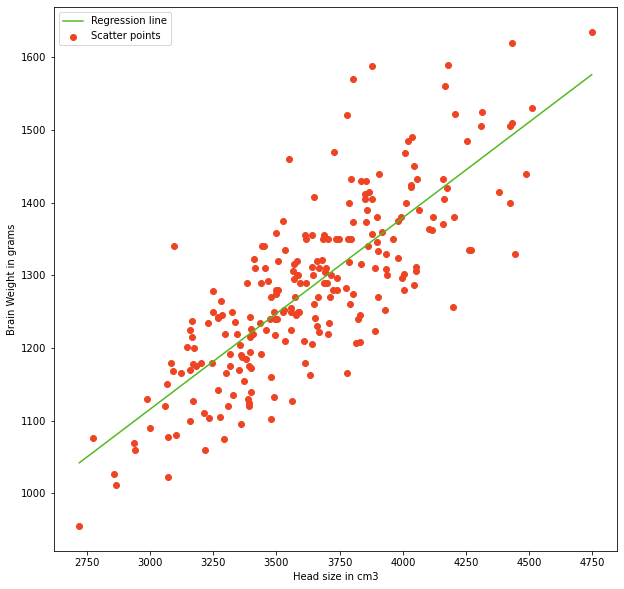

In [6]:
#plotting Scatter points
plt.scatter(X, Y, color='#ef4423', label='Scatter points')
#plotting line
plt.plot(x, y, color='#52b920', label='Regression line')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [7]:
ss_t =0
ss_r=0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t +=(Y[i]-mean_y)**2
    ss_r +=(Y[i]-y_pred)**2
r2 =1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = X.reshape(m, 1) #we cannot use rank 1 matrices in sklearn so we reshape

#model definition
brain_model = LinearRegression()

#model fitting
brain_model.fit(X, Y)

#model prediction
pred = brain_model.predict(X)

#model evaluation
r_squared_score = r2_score(Y, pred)

print((r_squared_score * 100), "percent")

63.9311719957 percent
